In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data.csv")

df

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg
0,774,0.1046,2020,10,43,70.2
1,1883,0.2509,2021,11,46,152.1
2,17258,0.1173,2020,3,13,12.3
3,1029,0.1808,2021,4,15,7.9
4,15566,0.0640,2020,8,35,6.6
...,...,...,...,...,...,...
65530,1010,0.1716,2020,1,3,41.4
65531,2739,0.6207,2023,3,13,42.6
65532,2074,0.0363,2022,4,15,21.4
65533,15616,0.2637,2021,2,8,16.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Farmer ID    65535 non-null  int64  
 1   CropArea_Ha  65535 non-null  float64
 2   YearName     65535 non-null  int64  
 3   MonthNumber  65535 non-null  int64  
 4   WeekNumber   65535 non-null  int64  
 5   QuantityKg   65535 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 3.0 MB


In [4]:
df.isnull().sum()

Farmer ID      0
CropArea_Ha    0
YearName       0
MonthNumber    0
WeekNumber     0
QuantityKg     0
dtype: int64

In [5]:
ordered_df = df.sort_values(by=["YearName", "MonthNumber", "WeekNumber"], ascending=False)

ordered_df

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg
506,957,0.1258,2023,12,53,21.7
838,17071,0.8000,2023,12,53,31.7
1350,1817,2.0000,2023,12,53,20.6
2123,2575,0.1187,2023,12,53,13.0
2704,17093,0.2242,2023,12,53,16.8
...,...,...,...,...,...,...
63381,15621,0.2542,2019,1,1,51.3
63593,2438,0.6944,2019,1,1,62.9
63859,1789,0.0794,2019,1,1,67.3
64303,1259,0.7672,2019,1,1,35.4


In [6]:
df["YearName"].unique()

array([2020, 2021, 2019, 2022, 2023])

In [7]:
df["MonthNumber"].unique()

array([10, 11,  3,  4,  8, 12,  9,  6,  2,  7,  5,  1])

In [8]:
df["WeekNumber"].unique()

array([43, 46, 13, 15, 35, 53, 34, 38, 23,  7, 39, 27, 31, 25, 32, 41, 30,
       29, 45, 17, 24, 18,  1, 52, 37, 42, 36, 16, 49, 48,  4,  3, 10, 21,
       47, 44, 14, 26,  8, 33, 11, 20,  5, 40, 19, 22, 12,  6, 51, 50,  2,
       28,  9])

In [9]:
df.groupby("Farmer ID")["Farmer ID"].count().sort_values(ascending=False).head()

Farmer ID
16629    76
515      75
938      75
17098    75
514      75
Name: Farmer ID, dtype: int64

In [10]:
# df["Farmer ID"].value_counts()
df[df["Farmer ID"] == 16629].head(20)

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg
1193,16629,0.265,2023,11,46,187.2
3479,16629,0.265,2022,3,10,124.8
3660,16629,0.265,2021,6,27,187.9
4892,16629,0.265,2020,4,18,77.3
5842,16629,0.265,2022,2,6,67.2
6465,16629,0.265,2023,12,50,151.4
7295,16629,0.265,2020,5,22,180.1
9979,16629,0.265,2020,5,19,199.6
9991,16629,0.265,2023,12,53,71.8
10007,16629,0.265,2021,7,31,288.1


In [11]:
quantity_per_year = ordered_df.groupby("YearName")["QuantityKg"].sum().reset_index()

quantity_per_year = quantity_per_year.sort_values(by="YearName", ascending=True)
quantity_per_year

,YearName,QuantityKg
0,2019,1552516.5
1,2020,2087018.3
2,2021,1567842.2
3,2022,1415069.5
4,2023,1600546.3


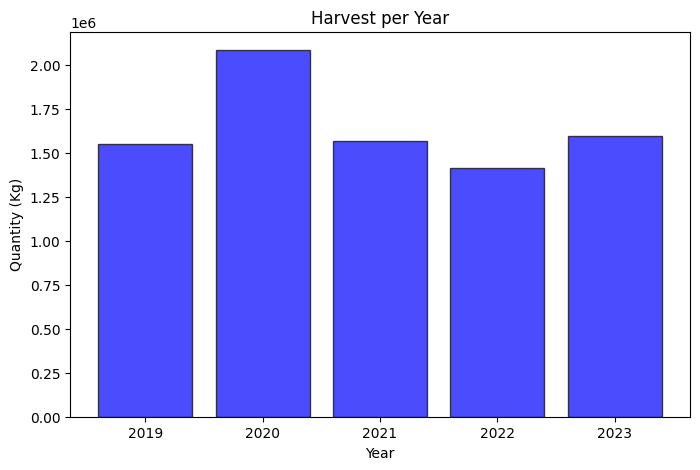

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(quantity_per_year["YearName"], quantity_per_year["QuantityKg"], color="blue", alpha=0.7, edgecolor="black")

plt.title("Harvest per Year")
plt.xlabel("Year")
plt.ylabel("Quantity (Kg)")

plt.savefig("img/harvest-per-year.png", dpi=300)
plt.show()

In [13]:
unique_farmers = ordered_df.groupby("YearName")["Farmer ID"].nunique().reset_index()
unique_farmers

,YearName,Farmer ID
0,2019,1659
1,2020,1734
2,2021,1666
3,2022,1604
4,2023,1791


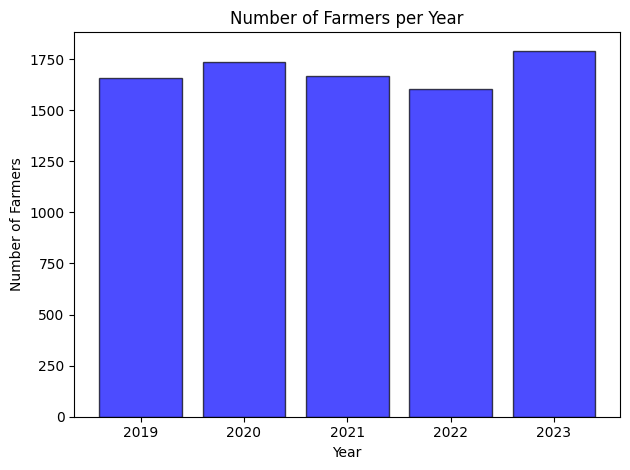

In [14]:
plt.bar(unique_farmers["YearName"], unique_farmers["Farmer ID"], color="blue", alpha=0.7, edgecolor="black")
plt.title("Number of Farmers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Farmers")
plt.tight_layout()

plt.savefig("img/number-of-farmers-per-year.png", dpi=300)
plt.show()

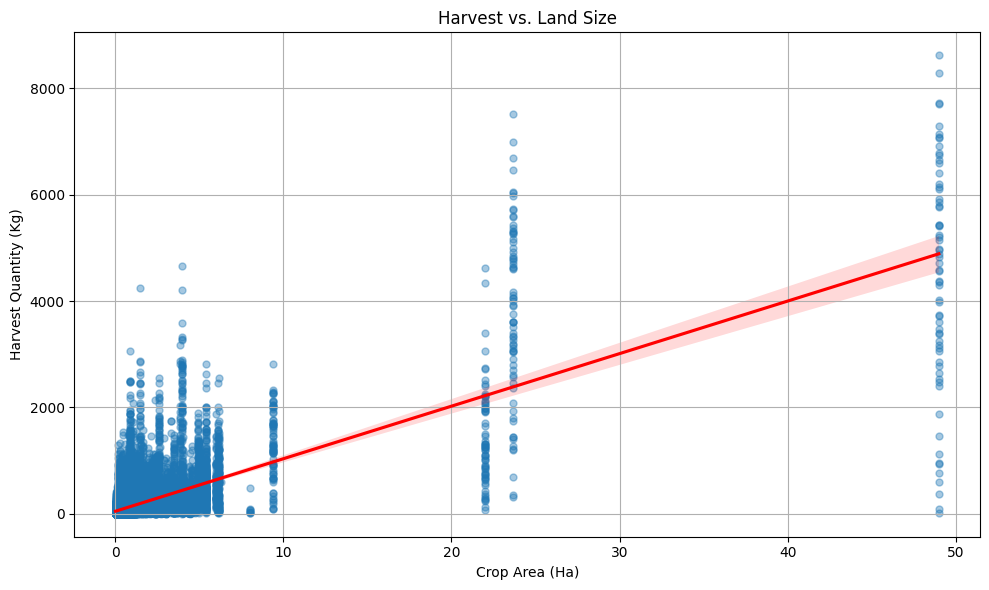

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    x='CropArea_Ha', y='QuantityKg', data=ordered_df,
    scatter_kws={"alpha": 0.4, "s": 25},   # semi-transparent points
    line_kws={"color": "red"},             # regression line
)
plt.xlabel("Crop Area (Ha)")
plt.ylabel("Harvest Quantity (Kg)")
plt.title("Harvest vs. Land Size")
plt.grid(True)
plt.tight_layout()

plt.savefig("img/harvest-vs-land-size.png", dpi=300)
plt.show()

In [17]:
ordered_df["YearName"].unique()

df_2019 = ordered_df[(ordered_df["YearName"] == 2019) & (ordered_df["WeekNumber"] != 1)]
df_2020 = ordered_df[(ordered_df["YearName"] == 2020) & (ordered_df["WeekNumber"] != 1)]
df_2021 = ordered_df[(ordered_df["YearName"] == 2021) & (ordered_df["WeekNumber"] != 1)]
df_2022 = ordered_df[ordered_df["YearName"] == 2022]
df_2023 = ordered_df[(ordered_df["YearName"] == 2023) & (ordered_df["WeekNumber"] != 1)]

df_2019

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg
5,1315,0.3177,2019,12,53,50.0
237,2296,0.5529,2019,12,53,45.4
445,2588,0.4879,2019,12,53,84.5
645,1092,0.3000,2019,12,53,74.0
1241,15588,0.2409,2019,12,53,18.7
...,...,...,...,...,...,...
65123,2281,0.2857,2019,1,2,153.2
65146,994,0.2208,2019,1,2,22.5
65286,15569,0.0843,2019,1,2,15.3
65382,833,2.9003,2019,1,2,669.9


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[["CropArea_Ha"]]
y = df["QuantityKg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 36308.66191960839
Mean Absolute Error: 88.83584401894768
R^2 Score: 0.5221812221677371


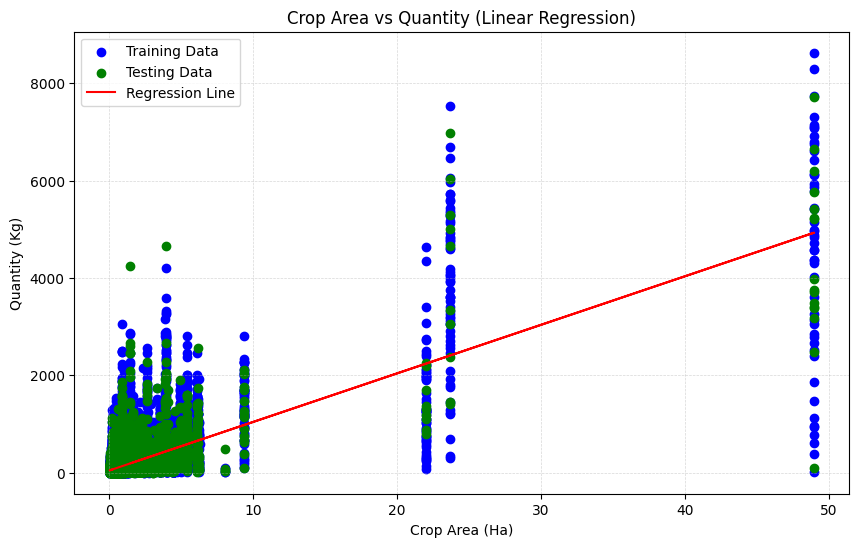

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")

plt.title("Crop Area vs Quantity (Linear Regression)")
plt.xlabel("Crop Area (Ha)")
plt.ylabel("Quantity (Kg)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

In [20]:
df_2019_quantity_per_week = df_2019.groupby("WeekNumber")["QuantityKg"].sum().reset_index().sort_values(by="WeekNumber", ascending=True)
df_2020_quantity_per_week = df_2020.groupby("WeekNumber")["QuantityKg"].sum().reset_index().sort_values(by="WeekNumber", ascending=True)
df_2021_quantity_per_week = df_2021.groupby("WeekNumber")["QuantityKg"].sum().reset_index().sort_values(by="WeekNumber", ascending=True)
df_2022_quantity_per_week = df_2022.groupby("WeekNumber")["QuantityKg"].sum().reset_index().sort_values(by="WeekNumber", ascending=True)
df_2023_quantity_per_week = df_2023.groupby("WeekNumber")["QuantityKg"].sum().reset_index().sort_values(by="WeekNumber", ascending=True)

In [21]:
for x in df_2020_quantity_per_week["WeekNumber"].values:
    if x not in df_2022_quantity_per_week["WeekNumber"].values:
        print(x)

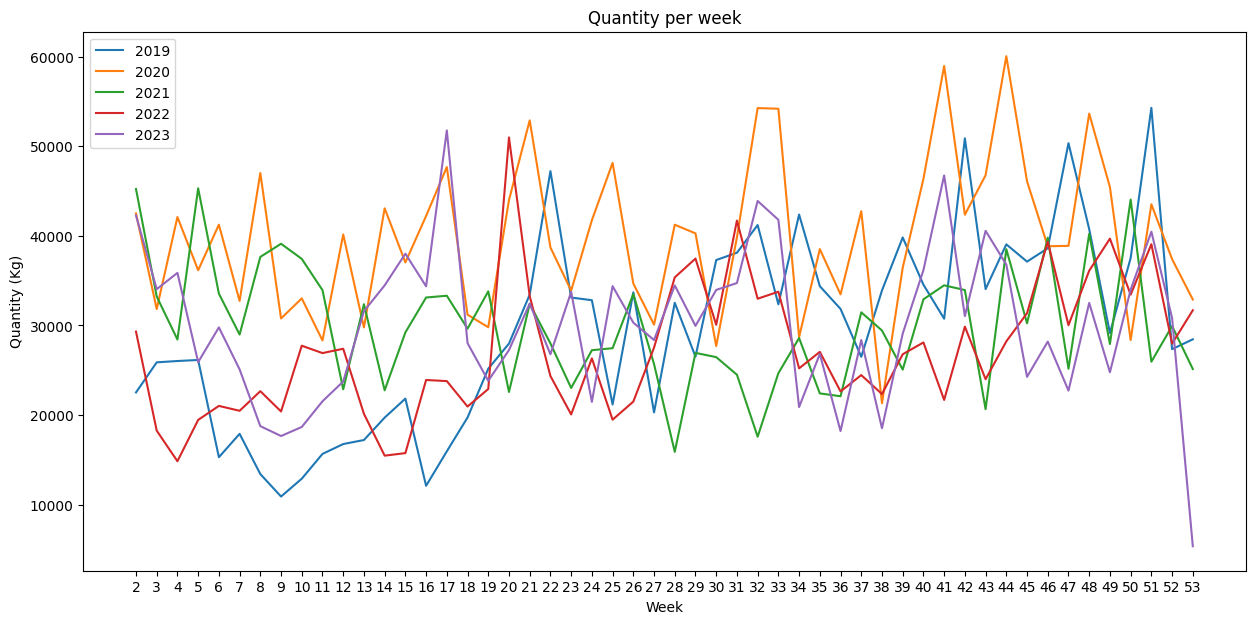

In [22]:
x = df_2019_quantity_per_week["WeekNumber"].values.reshape(-1, 1)
y1 = df_2019_quantity_per_week["QuantityKg"]
y2 = df_2020_quantity_per_week["QuantityKg"]
y3 = df_2021_quantity_per_week["QuantityKg"]
y4 = df_2022_quantity_per_week["QuantityKg"]
y5 = df_2023_quantity_per_week["QuantityKg"]

plt.figure(figsize=(15, 7))
plt.plot(x, y1, linestyle="-", label="2019")
plt.plot(x, y2, linestyle="-", label="2020")
plt.plot(x, y3, linestyle="-", label="2021")
plt.plot(x, y4, linestyle="-", label="2022")
plt.plot(x, y5, linestyle="-", label="2023")

plt.title("Quantity per week")
plt.xlabel("Week")
plt.ylabel("Quantity (Kg)")
plt.legend()
plt.xticks(x.flatten())  

plt.savefig("img/quantity-per-week.png", dpi=300)
plt.show()

In [23]:
yield_per_ha_2019 = df_2019.groupby("MonthNumber")[["CropArea_Ha", "QuantityKg"]].sum().reset_index().sort_values(by="MonthNumber", ascending=True)
yield_per_ha_2019["Yield_per_Ha"] = yield_per_ha_2019["QuantityKg"] / yield_per_ha_2019["CropArea_Ha"]

yield_per_ha_2020 = df_2020.groupby("MonthNumber")[["CropArea_Ha", "QuantityKg"]].sum().reset_index().sort_values(by="MonthNumber", ascending=True)
yield_per_ha_2020["Yield_per_Ha"] = yield_per_ha_2020["QuantityKg"] / yield_per_ha_2020["CropArea_Ha"]

yield_per_ha_2021 = df_2021.groupby("MonthNumber")[["CropArea_Ha", "QuantityKg"]].sum().reset_index().sort_values(by="MonthNumber", ascending=True)
yield_per_ha_2021["Yield_per_Ha"] = yield_per_ha_2021["QuantityKg"] / yield_per_ha_2021["CropArea_Ha"]

yield_per_ha_2022 = df_2022.groupby("MonthNumber")[["CropArea_Ha", "QuantityKg"]].sum().reset_index().sort_values(by="MonthNumber", ascending=True)
yield_per_ha_2022["Yield_per_Ha"] = yield_per_ha_2022["QuantityKg"] / yield_per_ha_2022["CropArea_Ha"]

yield_per_ha_2023 = df_2023.groupby("MonthNumber")[["CropArea_Ha", "QuantityKg"]].sum().reset_index().sort_values(by="MonthNumber", ascending=True)
yield_per_ha_2023["Yield_per_Ha"] = yield_per_ha_2023["QuantityKg"] / yield_per_ha_2023["CropArea_Ha"]

yield_per_ha_2023


,MonthNumber,CropArea_Ha,QuantityKg,Yield_per_Ha
0,1,652.7037,123543.2,189.279148
1,2,749.1199,96640.7,129.005650
2,3,767.3020,102031.7,132.974631
3,4,868.7702,164405.8,189.239686
4,5,844.9403,124940.6,147.869145
5,6,769.5480,127511.1,165.696097
6,7,861.6295,135806.9,157.616354
7,8,882.8708,155167.0,175.752783
8,9,734.0014,100678.6,137.164044
9,10,995.3969,169352.3,170.135450


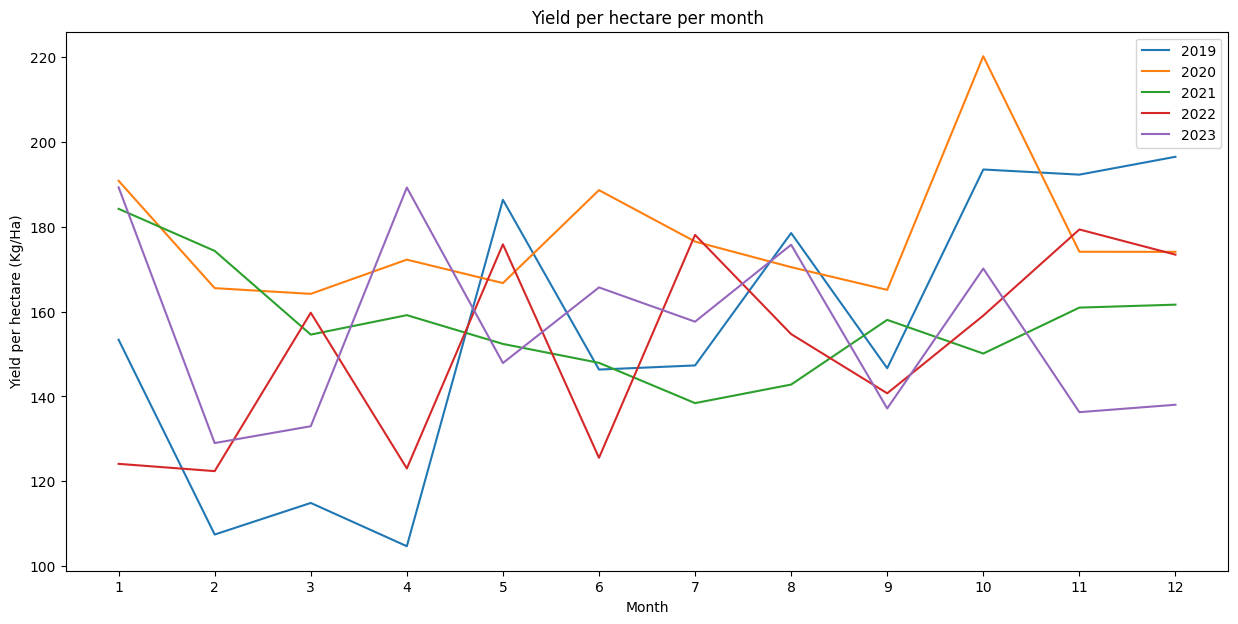

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(yield_per_ha_2019["MonthNumber"], yield_per_ha_2019["Yield_per_Ha"], linestyle="-", label="2019")
plt.plot(yield_per_ha_2020["MonthNumber"], yield_per_ha_2020["Yield_per_Ha"], linestyle="-", label="2020")
plt.plot(yield_per_ha_2021["MonthNumber"], yield_per_ha_2021["Yield_per_Ha"], linestyle="-", label="2021")
plt.plot(yield_per_ha_2022["MonthNumber"], yield_per_ha_2022["Yield_per_Ha"], linestyle="-", label="2022")
plt.plot(yield_per_ha_2023["MonthNumber"], yield_per_ha_2023["Yield_per_Ha"], linestyle="-", label="2023")

plt.title("Yield per hectare per month")
plt.xlabel("Month")
plt.ylabel("Yield per hectare (Kg/Ha)")
plt.legend()
plt.xticks(yield_per_ha_2019["MonthNumber"].values.flatten())

plt.savefig("img/yield-per-ha-per-month.png", dpi=300)
plt.show()

In [25]:
merged_df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023], axis=0)

merged_df.reset_index(drop=True, inplace=True)
merged_df.sort_values(by=["YearName", "MonthNumber"], ascending=False, inplace=True)

merged_df["Yield_per_Ha"] = merged_df["QuantityKg"] / merged_df["CropArea_Ha"]
merged_df

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg,Yield_per_Ha
51937,957,0.1258,2023,12,53,21.7,172.496025
51938,17071,0.8000,2023,12,53,31.7,39.625000
51939,1817,2.0000,2023,12,53,20.6,10.300000
51940,2575,0.1187,2023,12,53,13.0,109.519798
51941,17093,0.2242,2023,12,53,16.8,74.933095
...,...,...,...,...,...,...,...
12228,2281,0.2857,2019,1,2,153.2,536.226811
12229,994,0.2208,2019,1,2,22.5,101.902174
12230,15569,0.0843,2019,1,2,15.3,181.494662
12231,833,2.9003,2019,1,2,669.9,230.976106


In [38]:
merged_df_without_outliers = merged_df[~(merged_df["Yield_per_Ha"] < 100) & (merged_df["Yield_per_Ha"] > 700)]
merged_df_without_outliers

,Farmer ID,CropArea_Ha,YearName,MonthNumber,WeekNumber,QuantityKg,Yield_per_Ha
52077,2036,0.0457,2023,12,52,44.5,973.741794
52085,2027,0.1257,2023,12,52,90.1,716.785998
52089,1708,0.3326,2023,12,52,263.5,792.242934
52095,514,0.8928,2023,12,52,1005.3,1126.008065
52123,21163,0.2644,2023,12,52,196.6,743.570348
...,...,...,...,...,...,...,...
12140,1933,0.2736,2019,1,2,211.7,773.757310
12176,2665,0.1543,2019,1,2,287.0,1860.012962
12181,2169,0.1966,2019,1,2,236.1,1200.915565
12213,889,0.1229,2019,1,2,274.3,2231.895850


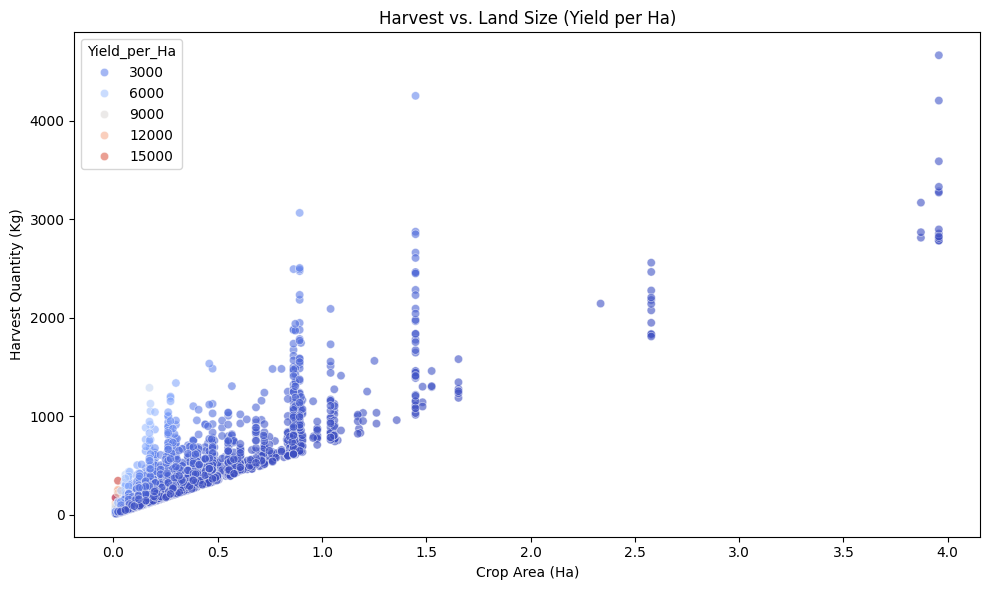

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df_without_outliers,
    x="CropArea_Ha",
    y="QuantityKg",
    hue="Yield_per_Ha",      
    palette="coolwarm",      
    alpha=0.6
)

plt.title("Harvest vs. Land Size (Yield per Ha)")
plt.xlabel("Crop Area (Ha)")
plt.ylabel("Harvest Quantity (Kg)")
plt.tight_layout()

plt.savefig("img/harvest-efficiency.png", dpi=300)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

features = ["CropArea_Ha", "MonthNumber"]
X = merged_df_without_outliers[features].values.reshape(-1, len(features))
y = merged_df_without_outliers["QuantityKg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNeighborsRegressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(3, 101):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"n_neighbors: {i}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("----------------------------------------")

n_neighbors: 3
Mean Absolute Error: 101.75550949913644
Mean Squared Error: 34507.9443408175
R-squared: 0.7625363891386469
----------------------------------------
n_neighbors: 4
Mean Absolute Error: 97.25518134715026
Mean Squared Error: 31455.471227979273
R-squared: 0.783541734466458
----------------------------------------
n_neighbors: 5
Mean Absolute Error: 95.36831088082901
Mean Squared Error: 29554.225801036264
R-squared: 0.7966250001561357
----------------------------------------
n_neighbors: 6
Mean Absolute Error: 93.35226252158893
Mean Squared Error: 29301.89872366148
R-squared: 0.7983613684057109
----------------------------------------
n_neighbors: 7
Mean Absolute Error: 91.09492227979275
Mean Squared Error: 27861.987887913714
R-squared: 0.8082699976476623
----------------------------------------
n_neighbors: 8
Mean Absolute Error: 90.80716321243524
Mean Squared Error: 28231.639659812176
R-squared: 0.8057262690601417
----------------------------------------
n_neighbors: 9
Mean

In [43]:
from sklearn.neighbors import KNeighborsRegressor
import pickle 

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

Mean Absolute Error: 91.09492227979275
Mean Squared Error: 27861.987887913714
R-squared: 0.8082699976476623
